In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.fftpack
import datetime
import time

## Import data from belfast.pvos.org

In [3]:

feed_a_pubkey = "xygzemcr5jcw" # modify this to match a public key on belfast.pvos.org

base_url = "http://belfast.pvos.org/data/"
#df = pd.read_csv(base_url+feed_a_pubkey+"/csv/")

start = time.time()
df = pd.read_csv(base_url+feed_a_pubkey+"/csv/", index_col='timestamp', parse_dates=True)
end = time.time()

print("download took: ", end-start, " seconds")


download took:  3.9784743785858154  seconds


## Select time range, remove outliers

In [4]:

#create an index for the date range we'd like
c0 = df.index.to_series().between('2021-5-19', '2021-5-20')

#create a new dataframe using this index
subset=df[c0]

#select just the 'distance_meters' variable
tides=subset['distance_meters']

#remove some outliers
tides=tides[tides < 6000]
tides=tides[tides > 2000]



In [5]:
tides

timestamp
2021-05-19 00:00:00.016527    3987.0
2021-05-19 00:00:00.199632    3987.0
2021-05-19 00:00:00.382033    3987.0
2021-05-19 00:00:00.568542    3988.0
2021-05-19 00:00:00.737174    3988.0
                               ...  
2021-05-19 23:59:58.753898    3438.0
2021-05-19 23:59:58.832972    3438.0
2021-05-19 23:59:58.912314    3438.0
2021-05-19 23:59:58.991045    3438.0
2021-05-19 23:59:59.070748    3437.0
Name: distance_meters, Length: 465599, dtype: float64

## Plot

<AxesSubplot:title={'center':'ultrasonic distance vs time'}, xlabel='timestamp'>

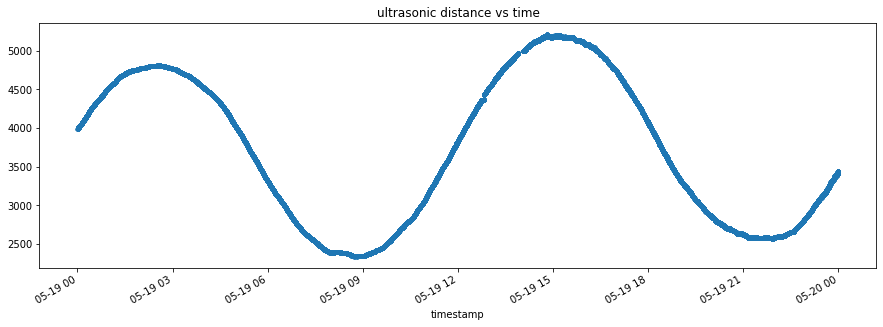

In [6]:
tides.plot(style='.-',figsize=(15, 5),title='ultrasonic distance vs time')